In [1]:
## Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
## Importando arquivo
df_clientes = pd.read_excel('caso_estudo.xlsx', sheet_name = 'clientes')
df_lojas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'lojas')
df_produtos= pd.read_excel('caso_estudo.xlsx', sheet_name = 'produtos')
df_pagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'pagamentos')
df_vendas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'vendas')

## Análise Preliminar

In [3]:
## Verificando 5 primeiros dados do dataframe clientes aleatoriamente
df_clientes.sample(5)

,id,nome,sexo,dt_nasc
634,635,Danilo Silva,M,5/30/1966
321,322,Renan Goncalves,M,7/27/1990
500,501,Daniel Goncalves,M,1/15/1967
557,558,Mariana Castro,F,1/4/1983
501,502,Eduarda Costa,F,2/20/1958


In [4]:
## Verificando 5 primeiros dados do dataframe clientes na ordem
df_clientes.head(5)

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953


In [5]:
## Verificando 5 últimos dados do dataframe clientes 
df_clientes.tail(5)

,id,nome,sexo,dt_nasc
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994
999,1000,Gustavo Barbosa,M,12/30/1975


In [6]:
# Detecta valores nulos
df_clientes.isnull()

,id,nome,sexo,dt_nasc
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [7]:
## Identifica o nulo e aplica soma nos dados
df_clientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [8]:
## Transpondo tabela
df_clientes.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
id,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
nome,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sexo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dt_nasc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
## Aplicando função verificadora any 
df_clientes.isnull().T.any()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
## Filtrando dataframe para verificar se há algum dado nulo
df_clientes[df_clientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [11]:
df_clientes.sexo

0      F
1      M
2      M
3      F
4      F
      ..
995    F
996    F
997    F
998    M
999    M
Name: sexo, Length: 1000, dtype: object

In [12]:
## identoficando valores nulos na tabela sexo
df_clientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [13]:
df_produtos.describe()

,id,valor
count,10.00000,1.000000e+01
mean,5.50000,3.222752e+05
std,3.02765,1.015119e+06
min,1.00000,2.000000e+01
25%,3.25000,2.475000e+02
50%,5.50000,7.800000e+02
75%,7.75000,2.100000e+03
max,10.00000,3.211352e+06


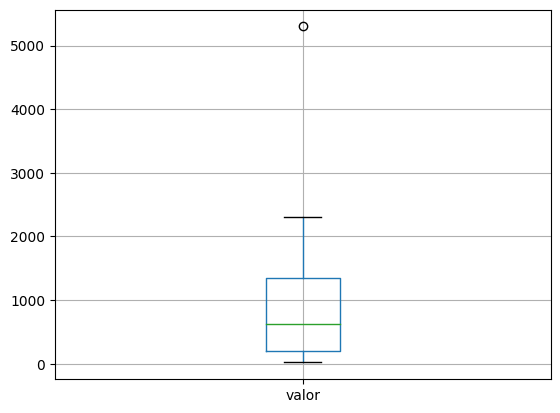

In [85]:
# Geração de gráfico de boxplot para verfificar valor nulo
df_produtos.boxplot(column=['valor'])
plt.show()

In [14]:
# Eliminando valor nulo do daframe produtos
df_produtos[df_produtos.valor>3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


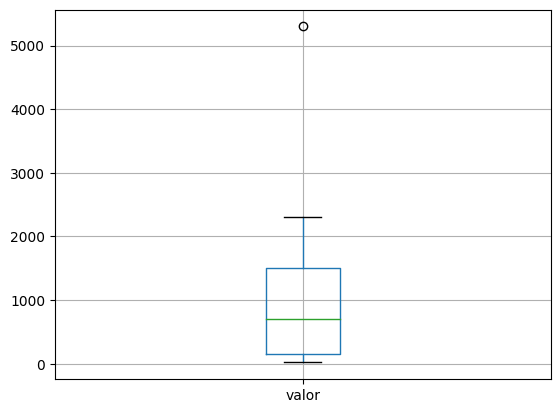

In [15]:
# Geração de boxplot sem valor nulo no dataframe produto
df_produtos[df_produtos.valor < 3000000].boxplot(column=['valor'])
plt.show()

# Data Cleanning
## Dados Nulos

In [16]:

df_clientes.loc[df_clientes.nome.isnull(),'nome'] = 'Sem Nome'
df_clientes.loc[df_clientes.sexo.isnull(),'sexo'] = 'Outro'
df_clientes.loc[df_clientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2020'

In [17]:
df_clientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,1/1/2020
287,288,Victor Ribeiro,Outro,12/17/1974


In [18]:
df_clientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [19]:
df_produtos.isnull().sum()

id         0
produto    0
valor      0
dtype: int64

In [20]:
df_lojas.isnull().sum()

id        0
cidade    0
dtype: int64

In [21]:
df_pagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

# Outiliers

In [22]:
## Dados númericos: Busca por outiliers
df_produtos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [23]:
df_produtos.loc[9,'valor'] =  df_produtos.valor[9]/10000
df_produtos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


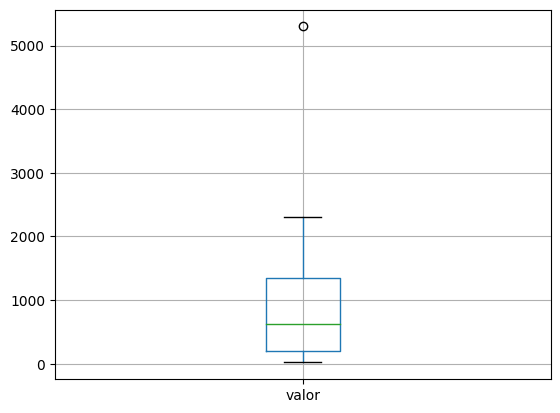

In [24]:
df_produtos.boxplot(column=['valor'])
plt.show()

# Consistência

In [25]:
# Verificando ID de clientes que tem ligação com ID de vendas
df_vendas.id_cliente.isin(df_clientes.id)

0       True
1       True
2       True
3       True
4       True
        ... 
2995    True
2996    True
2997    True
2998    True
2999    True
Name: id_cliente, Length: 3000, dtype: bool

In [77]:
# Gerando negação (Verificando os que não existem)
~df_vendas.id_cliente.isin(df_clientes.id).any()

False

In [78]:
# Verificar ID clientes que não estão na tabelas clientes
df_vendas[~df_vendas.id_cliente.isin(df_clientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [83]:
df_vendas[~df_vendas.id_loja.isin(df_lojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [79]:
df_vendas[~df_vendas.id_produto.isin(df_produtos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda
